In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [2]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 4.3 MB/s 


In [3]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

# Pclass Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.PassengerId.head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [28]:
train.PassengerId.value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [29]:
train.PassengerId.dtypes

dtype('int64')

In [30]:
train.PassengerId.isnull().sum()

0

In [31]:
train.PassengerId.describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [32]:
train.groupby('PassengerId').aggregate('count')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,1,1,1,1,1,1,1,0,1
888,1,1,1,1,1,1,1,1,1,1,1
889,1,1,1,1,0,1,1,1,1,0,1


In [33]:
train.groupby('PassengerId').aggregate('sum')

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,0.0,1,2,23.4500


In [34]:
train.groupby('PassengerId').aggregate('min')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [35]:
train.groupby('PassengerId').aggregate('max')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [36]:
train.groupby('PassengerId').aggregate('std')

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
887,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
train.groupby('PassengerId').aggregate('mean')

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0.0,3.0,22.0,1.0,0.0,7.2500
2,1.0,1.0,38.0,1.0,0.0,71.2833
3,1.0,3.0,26.0,0.0,0.0,7.9250
4,1.0,1.0,35.0,1.0,0.0,53.1000
5,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
887,0.0,2.0,27.0,0.0,0.0,13.0000
888,1.0,1.0,19.0,0.0,0.0,30.0000
889,0.0,3.0,NaN,1.0,2.0,23.4500


In [38]:
train.groupby('PassengerId').aggregate('median')

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0.0,3.0,22.0,1.0,0.0,7.2500
2,1.0,1.0,38.0,1.0,0.0,71.2833
3,1.0,3.0,26.0,0.0,0.0,7.9250
4,1.0,1.0,35.0,1.0,0.0,53.1000
5,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
887,0.0,2.0,27.0,0.0,0.0,13.0000
888,1.0,1.0,19.0,0.0,0.0,30.0000
889,0.0,3.0,NaN,1.0,2.0,23.4500


In [39]:
train.PassengerId.agg(['count', 'mean', 'std', 'sum', 'max', 'min'])

count       891.000000
mean        446.000000
std         257.353842
sum      397386.000000
max         891.000000
min           1.000000
Name: PassengerId, dtype: float64

In [40]:
pd.pivot_table(train, index = 'PassengerId', columns = 'SibSp', values = 'Ticket' ,aggfunc ='count')

SibSp,0,1,2,3,4,5,8
PassengerId,,,,,,,
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
887,1.0,NaN,NaN,NaN,NaN,NaN,NaN
888,1.0,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [41]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Evaluations of Parch Distributions')

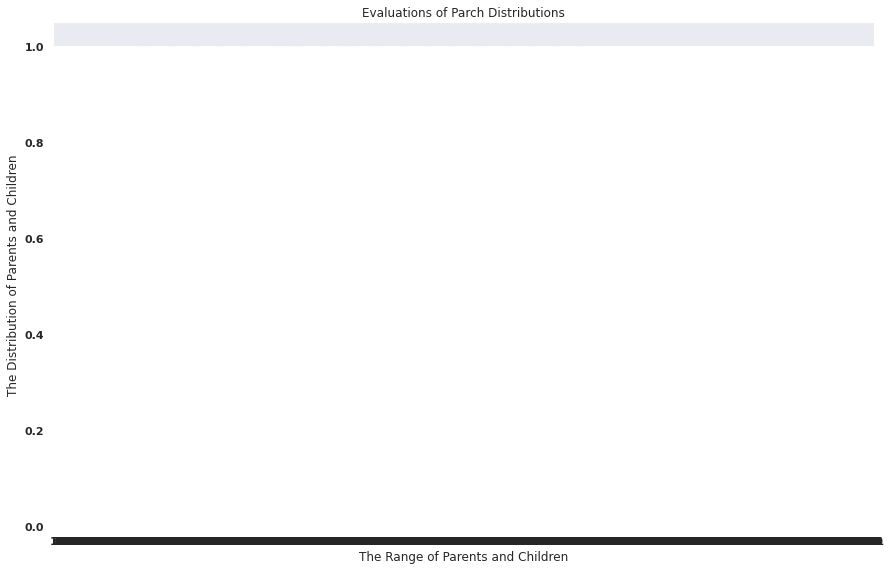

In [44]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="PassengerId", data=train)
plt.xlabel('The Range of Parents and Children')
plt.ylabel('The Distribution of Parents and Children')
plt.title('Evaluations of Parch Distributions')

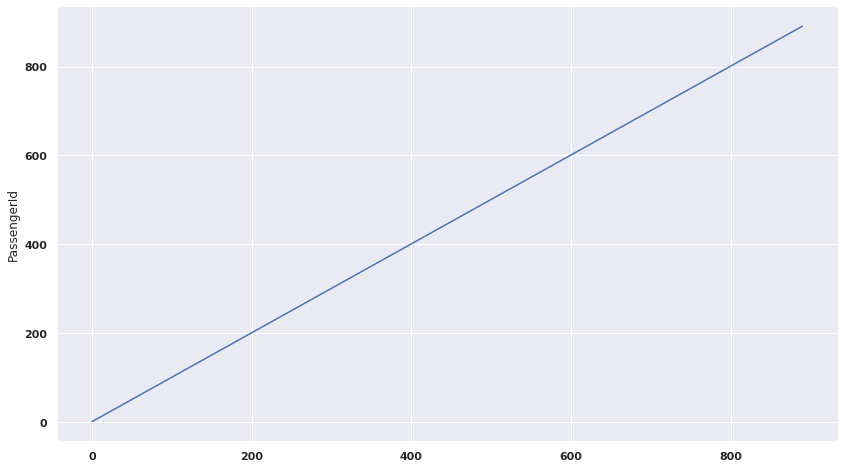

In [45]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(14,8)})
sns.lineplot(data = train.PassengerId)
plt.show()